# Z-критерий для двух долей 

In [1]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

## Загрузка данных

In [2]:
#data = pd.read_csv('banner_click_stat.txt', header = None, sep = '\t')
#data.columns = ['banner_a', 'banner_b']

In [37]:
#data.head()

In [36]:
#data.describe()

## Интервальные оценки долей

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [5]:
#conf_interval_banner_a = proportion_confint(sum(data.banner_a), 
                                            data.shape[0],
                                            method = 'wilson')
#conf_interval_banner_b = proportion_confint(sum(data.banner_b), 
                                            data.shape[0],
                                            method = 'wilson')

In [38]:
#print '95%% confidence interval for a click probability, banner a: [%f, %f]' % conf_interval_banner_a
#print '95%% confidence interval for a click probability, banner b [%f, %f]' % conf_interval_banner_b

TASK 3. 
В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.


## Z-критерий для разности долей (независимые выборки)

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$      
  $$ \hat{p}_1 = \frac{a}{n_1}$$     $$ \hat{p}_2 = \frac{b}{n_2}$$
$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$
$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [19]:
a=10
n1=34
b=4
n2=16
p1=a/n1
p2=b/n2
P = (p1*n1+p2*n2)/(n1+n2)
Z = (p1-p2)/((P*(1-P)*(1/n1+1/n2))**0.5)
print('P:',P)
print('Z:',Z)

P: 0.28
Z: 0.32410186177608225


In [27]:
X_train = np.concatenate([np.ones(10), np.zeros(24)])
X_test = np.concatenate([np.ones(4), np.zeros(12)])

In [28]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [29]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [30]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [24]:
print (round(proportions_diff_z_test(Z,'greater'),4))

0.3729


In [31]:
print ("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(X_train,X_test))

95% confidence interval for a difference between proportions: [-0.217558, 0.305793]


In [35]:
print ("p-value: %f" % round(proportions_diff_z_test(proportions_diff_z_stat_ind(X_train,X_test), alternative='greater'),4))

p-value: 0.372900


Task 4 
Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:
Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

логистическая регрессия по признакам X1,X2,X3;
логистическая регрессия по признакам X4,X5,X6.
Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).



In [135]:
from sklearn.cross_validation import train_test_split

In [136]:
data = pd.read_csv('banknotes.txt', sep = '\t')
data.head()

,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [137]:
#data[['X1','X2']].head()

In [138]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data['real'],test_size=0.25, random_state=1)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
#X_train[['X1','X2','X3']].values

In [141]:
clf1= LogisticRegression().fit(X_train[['X1','X2','X3']].values, y_train.values) 
#score(X, y, sample_weight=None)[source]
#Returns the mean accuracy on the given test data and labels.
clf1.score(X_test[['X1', 'X2', 'X3']].values, y_test.values)

0.80000000000000004

In [142]:
clf2= LogisticRegression().fit(X_train[['X4', 'X5', 'X6']].values, y_train.values) 
clf2.score(X_test[['X4', 'X5', 'X6']].values, y_test.values)

0.97999999999999998

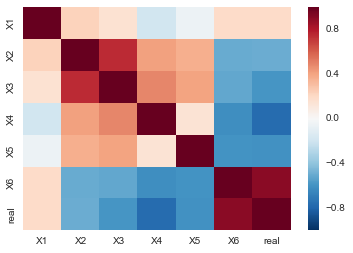

In [154]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.heatmap(data.corr())

In [161]:
from sklearn import metrics
x1_predict=clf1.predict(X_test[['X1','X2','X3']])
x2_predict=clf2.predict(X_test[['X4','X5','X6']])
print(x1_predict.shape)

(50,)


In [162]:
print (metrics.classification_report(y_test, x1_predict))

             precision    recall  f1-score   support

          0       0.74      0.87      0.80        23
          1       0.87      0.74      0.80        27

avg / total       0.81      0.80      0.80        50



In [163]:
print (metrics.classification_report(y_test, x2_predict))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        23
          1       0.96      1.00      0.98        27

avg / total       0.98      0.98      0.98        50



In [164]:
errors1 = np.abs(y_test-x1_predict)
errors1
print(np.mean(errors1))

0.2


In [165]:
errors2 = np.abs(y_test-x2_predict)
#print(errors2)
print(np.mean(errors2))

0.02


## Z-критерий для разности долей (связанные выборки)

  $X_1$ \ $X_2$ | 1| 0 | $\sum$
  ------------- | -------------|
  1  | e | f | e + f
  0  | g | h | g + h
  $\sum$ | e + g| f + h | n  
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

In [166]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [167]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [170]:
print ("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(errors1, errors2)))

p-value: 0.003297


Task 5. В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

In [171]:
print ("95%% confidence interval for a difference between proportions: [%f, %f]" \
      % proportions_diff_confint_rel(errors1, errors2))

95% confidence interval for a difference between proportions: [0.059945, 0.300055]


Task 6. Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.


С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.
Критерий Стьюдента:

H0:  средний полученный бал одинаков для студентов закончивших и незакончивших специальные подготовительные курсы. mu=mu0

H1:  не одинаковы.


In [185]:
mu0 = 525
sigma = 100
mu = 541.4
n = 100

In [187]:
t = (mu - mu0)/(sigma/np.sqrt(n))
t

1.6399999999999977

In [188]:

p = 1-stats.norm.cdf(t)
p

0.050502583474103968

TASK 7. 
Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [189]:
mu0 = 525
sigma = 100
mu = 541.5
n = 100

In [190]:
t = (mu - mu0)/(sigma/np.sqrt(n))
t

1.6499999999999999

In [191]:
p = 1-stats.norm.cdf(t)
p

0.049471468033648103